<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part_2_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [185]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [186]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [220]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [221]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [222]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [223]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [224]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [225]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [226]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [227]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [228]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,253.900752,6.119359e+01,684.905658,249.451739,5.680361e+01,693.744649,0.299739
1,460.678694,1.522943e+02,387.026978,427.200578,1.480489e+02,424.750571,0.501737
2,999.000000,1.000000e+00,0.000000,997.280800,1.857998e+00,0.861202,1.243405
3,977.560377,1.159226e+01,10.847361,974.720637,1.297743e+01,12.301938,0.237046
4,203.807459,1.403012e+00,794.789529,203.694605,1.238926e+00,795.066470,0.419838
...,...,...,...,...,...,...,...
995,206.616379,5.438149e+00,787.945472,206.201677,4.848288e+00,788.950035,0.391059
996,223.591872,2.794194e+01,748.466190,217.387728,2.007615e+01,762.536124,1.181987
997,248.453375,5.579684e+01,695.749782,245.059215,5.231334e+01,702.627447,0.254539
998,202.845900,4.070423e-08,797.154100,202.845900,2.985826e-08,797.154100,1.035531


In [229]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [230]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6
0,6.412685e-02,3.975504e-01,0.859189,5.853884e-02,3.690831e-01,0.870277,0.150081
1,3.238479e-01,9.893957e-01,0.485511,2.817987e-01,9.619517e-01,0.532833,0.251238
2,1.000000e+00,6.496603e-03,0.000000,9.978427e-01,1.207240e-02,0.001079,0.622655
3,9.730710e-01,7.531032e-02,0.013608,9.695062e-01,8.432120e-02,0.015431,0.118685
4,1.207755e-03,9.114813e-03,0.997034,1.066008e-03,8.049954e-03,0.997381,0.210224
...,...,...,...,...,...,...,...
995,4.735866e-03,3.532949e-02,0.988448,4.214994e-03,3.150189e-02,0.989708,0.195813
996,2.605774e-02,1.815277e-01,0.938923,1.826513e-02,1.304453e-01,0.956573,0.591898
997,5.728473e-02,3.624899e-01,0.872792,5.302165e-02,3.399074e-01,0.881420,0.127445
998,3.515160e-11,2.675283e-10,1.000000,2.578771e-11,1.970983e-10,1.000000,0.518555


In [231]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [233]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [234]:
from sklearn.metrics import mean_absolute_error

In [203]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [123]:
 #Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[03:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.1029698 for 308 rounds
CV with max_depth=9, min_child_weight=6
[03:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [124]:
params['max_depth'] = 11
params['min_child_weight'] = 5

In [125]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [126]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[03:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.108546 for 308 rounds
CV with subsample=1.0, colsample=0.9
[03:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:5

In [104]:
params['subsample'] = .7
params['colsample_bytree'] = .9

In [105]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
CV with eta=0.3
[03:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1.71 s, sys: 26.9 ms, total: 1.74 s
Wall time: 1.74 s
	MAE 0.10151139999999999 for 139 rounds

CV with eta=0.2
[03:06:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:06:27] WARNING: /workspace/

In [106]:
params['eta'] = .1

In [235]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[03:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.215803
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.206511
[2]	Test-mae:0.199068
[3]	Test-mae:0.19251
[4]	Test-mae:0.187185
[5]	Test-mae:0.181081
[6]	Test-mae:0.17623
[7]	Test-mae:0.171672
[8]	Test-mae:0.166739
[9]	Test-mae:0.162983
[10]	Test-mae:0.159813
[11]	Test-mae:0.156586
[12]	Test-mae:0.153383
[13]	Test-mae:0.150992
[14]	Test-mae:0.148752
[15]	Test-mae:0.147209
[16]	Test-mae:0.145604
[17]	Test-mae:0.144353
[18]	Test-mae:0.14199
[19]	Test-mae:0.140196
[20]	Test-mae:0.138619
[21]	Test-mae:0.136437
[22]	Test-mae:0.135196
[23]	Test-mae:0.13487
[24]	Test-mae:0.13409
[25]	Test-mae:0.132505
[26]	Test-mae:0.131291
[27]	Test-mae:0.130517
[28]	Test-mae:0.129879
[29]	Test-mae:0.129376
[30]	Test-mae:0.128259
[31]	Test-mae:0.127485
[32]	Test-mae:0.126608
[33]	Test-mae:0.125889
[34]	Test-mae:0.125113
[35]	Test-mae:0.123736
[36]

In [236]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[03:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.215803
[1]	Test-mae:0.206511
[2]	Test-mae:0.199068
[3]	Test-mae:0.19251
[4]	Test-mae:0.187185
[5]	Test-mae:0.181081
[6]	Test-mae:0.17623
[7]	Test-mae:0.171672
[8]	Test-mae:0.166739
[9]	Test-mae:0.162983
[10]	Test-mae:0.159813
[11]	Test-mae:0.156586
[12]	Test-mae:0.153383
[13]	Test-mae:0.150992
[14]	Test-mae:0.148752
[15]	Test-mae:0.147209
[16]	Test-mae:0.145604
[17]	Test-mae:0.144353
[18]	Test-mae:0.14199
[19]	Test-mae:0.140196
[20]	Test-mae:0.138619
[21]	Test-mae:0.136437
[22]	Test-mae:0.135196
[23]	Test-mae:0.13487
[24]	Test-mae:0.13409
[25]	Test-mae:0.132505
[26]	Test-mae:0.131291
[27]	Test-mae:0.130517
[28]	Test-mae:0.129879
[29]	Test-mae:0.129376
[30]	Test-mae:0.128259
[31]	Test-mae:0.127485
[32]	Test-mae:0.126608
[33]	Test-mae:0.125889
[34]	Test-mae:0.125113
[35]	Test-mae:0.123736
[36]	Test-mae:0.122942
[37]	Test-mae:0.122857
[38]	Test-mae:

In [237]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.0870219479906731

In [238]:
best_model.save_model("my_model.model")

In [239]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[03:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


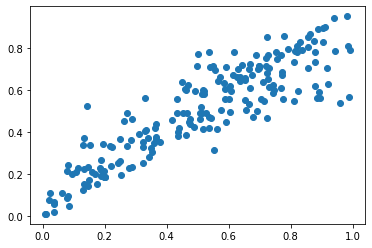

In [240]:
plt.scatter(y_test,p)

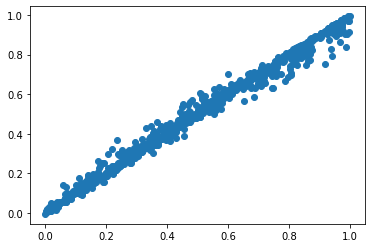

In [241]:
plt.scatter(y_train,q)

In [242]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, p))
r2_test = r2_score(y_test, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.031057964506547138
R2 score of training set is 0.9878900869116329


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.12147478495002292
R2 score of test set is 0.7902287956444594
